# HW8
## Sebastian Trojan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("rym_top5000.csv")
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


## Zadanie 1

1.1 Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [4]:
df_pom = df.groupby("Artist Name")["Album"].agg("count").to_frame().reset_index()
zad_1 = df.merge(df_pom[df_pom.Album>5]["Artist Name"], on = "Artist Name")\
.groupby("Artist Name")["Average Rating"].agg(mediana_ocen = "median").reset_index()\
.sort_values("mediana_ocen",ascending = False).reset_index(drop = True).head(10)
zad_1

,Artist Name,mediana_ocen
0,David Bowie,4.050
1,The Beatles,4.045
2,King Crimson,3.970
3,The Rolling Stones,3.965
4,Black Sabbath,3.950
5,Led Zeppelin,3.940
6,Pink Floyd,3.910
7,Death,3.905
8,John Coltrane,3.905
9,Bob Dylan,3.890


1.2 Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10 oraz najwyższą i najniższą ocenę dla każdego z tych artystów.

In [5]:
zad_2 = df.groupby("Artist Name")["Average Rating"].agg(["max","min"])
zad_2 = zad_2.assign(różnica = abs(zad_2[max]- zad_2[min])).reset_index()\
.sort_values("różnica",ascending = False).reset_index(drop = True).head(10)
zad_2

,Artist Name,max,min,różnica
0,Kendrick Lamar,4.27,3.52,0.75
1,The Beatles,4.25,3.55,0.70
2,Pink Floyd,4.29,3.60,0.69
3,My Bloody Valentine,4.24,3.58,0.66
4,King Crimson,4.30,3.67,0.63
5,John Coltrane,4.30,3.70,0.60
6,Radiohead,4.23,3.66,0.57
7,Miles Davis,4.23,3.69,0.54
8,The Cure,4.17,3.63,0.54
9,Kanye West,4.07,3.54,0.53


1.3 Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [6]:
df["Number of Ratings"] = df["Number of Ratings"].replace(',','',regex=True).astype(int)
zad_3 = df.loc[(df["Number of Ratings"]>=5000) & (df["Number of Reviews"]>= 15)]\
.assign(stosunek = df["Number of Ratings"]/df["Number of Reviews"])[["Album", "stosunek"]]\
.sort_values("stosunek",ascending = False).reset_index(drop = True).head(10)
zad_3

,Album,stosunek
0,Jenny Death: The Powers That B Disc 2,361.833333
1,Bury Me at Makeout Creek,308.210526
2,春と修羅 (Haru to Shura),272.913043
3,Saturation,251.842857
4,Saturation III,251.735294
5,Scenery,248.666667
6,Endless,228.487179
7,Imperial,225.420000
8,Saturation II,215.552941
9,Bottomless Pit,202.098039


1.4 Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających?

a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

In [7]:
zad_4a = df.loc[df["Number of Reviews"]>df["Number of Reviews"].quantile(0.75)]\
.assign(rok_wydania = pd.to_datetime(df["Release Date"]).dt.year).groupby("rok_wydania")\
["Album"].agg(liczba_albumów = "count").reset_index()\
.sort_values("liczba_albumów",ascending = False).reset_index(drop = True).head(5)
zad_4a

,rok_wydania,liczba_albumów
0,1970,43
1,1971,41
2,1969,38
3,1994,36
4,1995,34


b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).

In [8]:
zad_4b = df.loc[df["Number of Ratings"]>df["Number of Ratings"].quantile(0.75)]\
.assign(rok_wydania = pd.to_datetime(df["Release Date"]).dt.year).groupby("rok_wydania")\
["Album"].agg(liczba_albumów = "count").reset_index()\
.sort_values("liczba_albumów",ascending = False).reset_index(drop = True)
zad_4b.head(5)


,rok_wydania,liczba_albumów
0,1994,41
1,1971,36
2,1970,35
3,1996,34
4,1995,33


## Zadanie 2

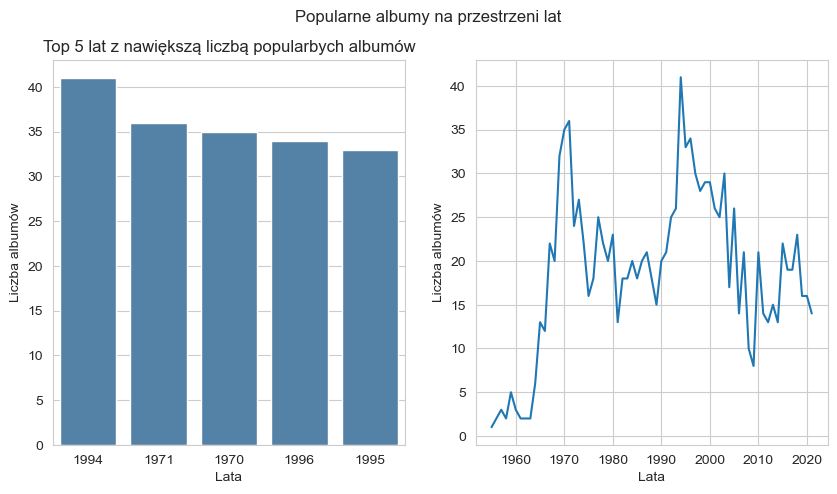

In [32]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2,  figsize=(10, 5))
plt.suptitle('Popularne albumy na przestrzeni lat')

sns.barplot(data=zad_4b.head(5), x= "rok_wydania", y = "liczba_albumów",\
            order=zad_4b.head(5).sort_values("liczba_albumów",ascending = False).rok_wydania, color='steelblue', ax = axes[0])
axes[0].set_title('Top 5 lat z nawiększą liczbą popularbych albumów')
axes[0].set_ylabel('Liczba albumów')
axes[0].set_xlabel('Lata')

sns.lineplot( y = "liczba_albumów", x = "rok_wydania", data = zad_4b, ax = axes[1]).set_title('')
axes[1].set_ylabel('Liczba albumów')
axes[1].set_xlabel("Lata")

plt.show()